<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher/blob/master/examples/WW-Albert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Albert models

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
if 'google.colab' in sys.modules:
    !pip install transformers weightwatcher gwpy matplotlib==3.1.3


In [3]:

from transformers import AutoModel
albert = AutoModel.from_pretrained('albert-base-v2')


In [4]:
import weightwatcher as ww
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(ww.__name__) 
logger.setLevel(logging.INFO)


In [5]:
%%capture

import warnings
warnings.filterwarnings('ignore')

watcher = ww.WeightWatcher(model=albert)
albert_details = watcher.describe()


INFO:weightwatcher:

python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
torch version 1.6.0
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'in

In [6]:
albert_details

,layer_id,name,M,N,Q,layer_type,longname,num_evals,rf
0,2,Embedding,128.0,30000.0,234.375,LAYER_TYPE.EMBEDDING,embeddings.word_embeddings,128.0,1.0
0,3,Embedding,128.0,512.0,4.000,LAYER_TYPE.EMBEDDING,embeddings.position_embeddings,128.0,1.0
0,4,Embedding,2.0,128.0,64.000,LAYER_TYPE.EMBEDDING,embeddings.token_type_embeddings,2.0,1.0
0,8,Linear,128.0,768.0,6.000,LAYER_TYPE.DENSE,encoder.embedding_hidden_mapping_in,128.0,1.0
0,15,Linear,768.0,768.0,1.000,LAYER_TYPE.DENSE,encoder.albert_layer_groups.0.albert_layers.0....,768.0,1.0
0,16,Linear,768.0,768.0,1.000,LAYER_TYPE.DENSE,encoder.albert_layer_groups.0.albert_layers.0....,768.0,1.0
0,17,Linear,768.0,768.0,1.000,LAYER_TYPE.DENSE,encoder.albert_layer_groups.0.albert_layers.0....,768.0,1.0
0,19,Linear,768.0,768.0,1.000,LAYER_TYPE.DENSE,encoder.albert_layer_groups.0.albert_layers.0....,768.0,1.0
0,21,Linear,768.0,3072.0,4.000,LAYER_TYPE.DENSE,encoder.albert_layer_groups.0.albert_layers.0.ffn,768.0,1.0
0,22,Linear,768.0,3072.0,4.000,LAYER_TYPE.DENSE,encoder.albert_layer_groups.0.albert_layers.0....,768.0,1.0


### What if we just randomize the rows or columns ?

This can't be right

In [16]:
%%capture

import weightwatcher as ww
import logging
import powerlaw
from numpy.random import shuffle

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(ww.__name__) 
logger.setLevel(logging.INFO)

W = watcher.get_Weights(layer=22)[0]
#W = W.T
#W = W.T

SVs = np.linalg.svd(W, compute_uv=False)
evals = SVs**2
fit = powerlaw.Fit(evals)



shuffle(W)
SVs = np.linalg.svd(W, compute_uv=False)
shuffled_evals = SVs**2
fit_shuf = powerlaw.Fit(shuffled_evals)
   


INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'f

(768, 3072) 768
4.5613302495443815 0.03449368953155374 4.5613302495443815 0.03449368953155374


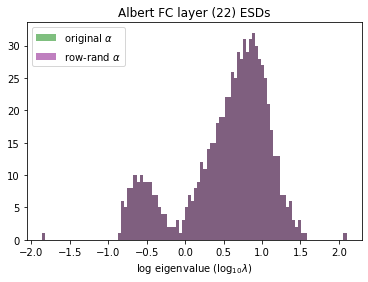

4.5613302495443815 0.03449368953155374 4.5613302495443815 0.03449368953155374


<AxesSubplot:>

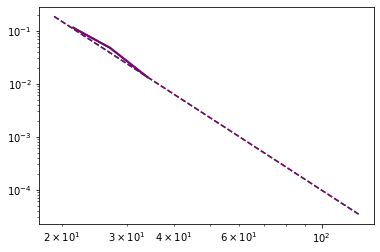

In [18]:
print(W.shape, len(evals))
print(fit.alpha, fit.D, fit_shuf.alpha, fit_shuf.D)


plt.hist(np.log10(evals[evals>0.0001]), bins=100, alpha=0.5, label=r'original $\alpha$', color='green');
plt.hist(np.log10(shuffled_evals[shuffled_evals>0.0001]), bins=100, alpha=0.5, color='purple', label=r'row-rand $\alpha$');
plt.legend()
plt.title("Albert FC layer (22) ESDs")
plt.xlabel(r"log eigenvalue $(\log_{10}\lambda)$")
plt.show()
print(fit.alpha, fit.D, fit_shuf.alpha, fit_shuf.D)

fig2 = fit.plot_pdf(color='g', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)

fig2 = fit_shuf.plot_pdf(color='purple', linewidth=2)
fit_shuf.power_law.plot_pdf(color='purple', linestyle='--', ax=fig2)



In [ ]:
W.shape